In [1]:
import pandas as pd
data=pd.read_excel('Data_Wordle_All_Features.xlsx',sheet_name='Data_Wordle_All_Features')
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,w5,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,16,1,4,7,0,0.0555,0.0552,0.0366,0.0322,0.0327
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,11,1,4,7,0,0.0474,0.0751,0.0856,0.0641,0.0084
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,5,2,3,7,2,0.0230,0.0712,0.0751,0.0230,0.1142
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,25,2,3,7,0,0.0023,0.0366,0.1142,0.0751,0.0200
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,11,1,4,12,0,0.0313,0.0751,0.0794,0.0641,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2023-04-21,671,kayak,17171,1768,0,2,13,37,33,...,11,2,3,7,4,0.0084,0.0856,0.0200,0.0856,0.0084
468,2023-04-22,672,broke,18527,1840,1,9,24,29,23,...,5,2,3,13,0,0.0212,0.0751,0.0712,0.0084,0.1142
469,2023-04-23,673,unzip,16915,1720,0,2,15,34,31,...,16,2,3,3,0,0.0366,0.0641,0.0024,0.0794,0.0327
470,2023-04-24,674,ditto,18104,1815,0,4,24,41,24,...,15,2,3,7,2,0.0313,0.0794,0.0746,0.0746,0.0712


In [2]:
dataNew=data[['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']]

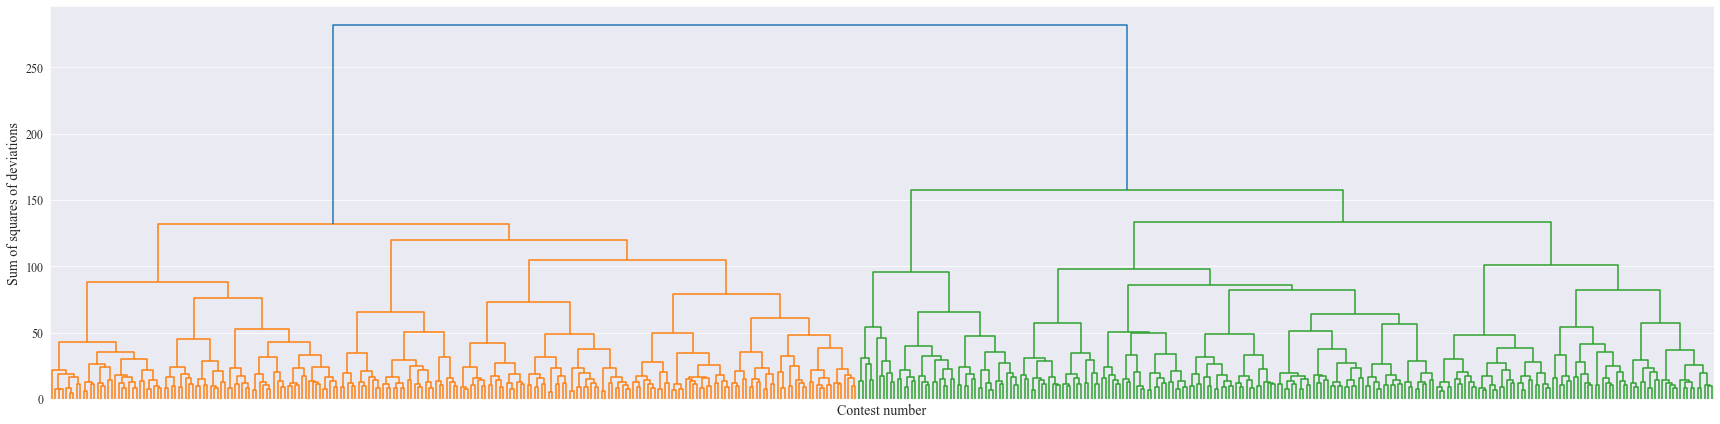

In [3]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
dendrogram = sch.dendrogram(sch.linkage(dataNew, method = 'ward'))
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('Contest number',fontsize=14)
plt.ylabel('Sum of squares of deviations',fontsize=14)
plt.xticks([],font='Times New Roman',fontsize=12)
plt.yticks(font='Times New Roman',fontsize=12)
plt.tight_layout()
plt.savefig("figures\\层次聚类树状图.pdf")

In [4]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

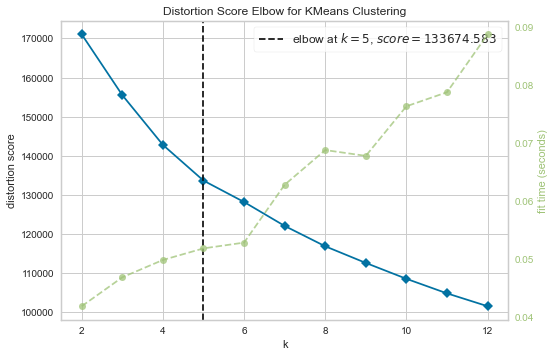

In [5]:
model = KElbowVisualizer(KMeans(random_state = 20222023), k=12)
model.fit(dataNew)
model.poof(outpath="figures\\肘部法则.pdf")

In [6]:
n_clusters = 5
cluster = KMeans(n_clusters = n_clusters, random_state = 20222023).fit(dataNew)
y_pred = cluster.labels_
data['Class']=y_pred
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre,Class
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,1,4,7,0,0.0555,0.0552,0.0366,0.0322,0.0327,4
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,1,4,7,0,0.0474,0.0751,0.0856,0.0641,0.0084,2
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,2,3,7,2,0.0230,0.0712,0.0751,0.0230,0.1142,3
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,2,3,7,0,0.0023,0.0366,0.1142,0.0751,0.0200,0
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,1,4,12,0,0.0313,0.0751,0.0794,0.0641,0.0084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2023-04-21,671,kayak,17171,1768,0,2,13,37,33,...,2,3,7,4,0.0084,0.0856,0.0200,0.0856,0.0084,3
468,2023-04-22,672,broke,18527,1840,1,9,24,29,23,...,2,3,13,0,0.0212,0.0751,0.0712,0.0084,0.1142,2
469,2023-04-23,673,unzip,16915,1720,0,2,15,34,31,...,2,3,3,0,0.0366,0.0641,0.0024,0.0794,0.0327,3
470,2023-04-24,674,ditto,18104,1815,0,4,24,41,24,...,2,3,7,2,0.0313,0.0794,0.0746,0.0746,0.0712,4


In [7]:
# 输出5个类别数据
def ClassDataOutPut(i):
    data[data['Class']==i].to_excel(f'Class\\Class {i}.xlsx',sheet_name='Class')


for i in range(5):
    ClassDataOutPut(i)

In [8]:
silhouette_score(dataNew, y_pred)

0.12253257702684031

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 472 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

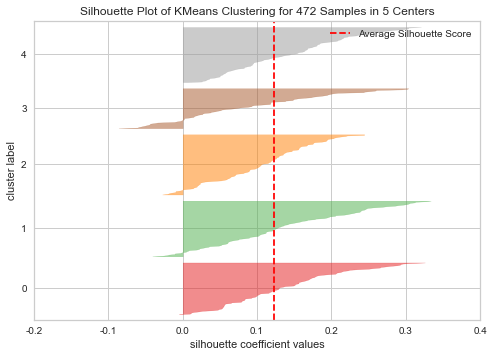

In [9]:
model = SilhouetteVisualizer(cluster)
model.fit(dataNew)
model.poof(outpath='figures\\轮廓系数.pdf')

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

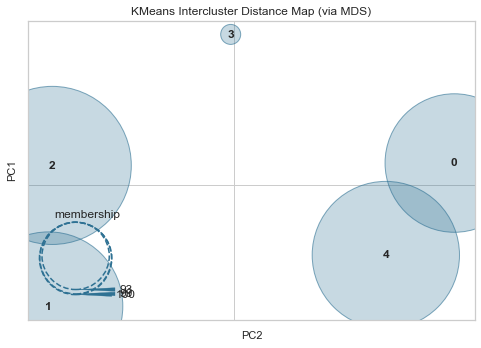

In [10]:
model = InterclusterDistance(cluster)
model.fit(dataNew)
model.poof(outpath='figures\\类间距离.pdf')

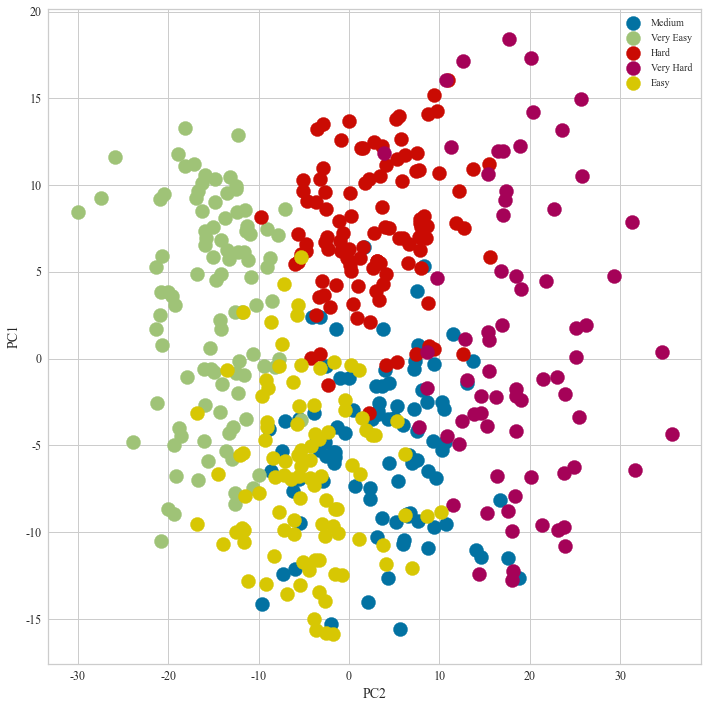

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
DataNewPCA = pca.fit_transform(dataNew)
x0, y0= [], []
x1, y1= [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

for index, value in enumerate(y_pred):
    if value == 0:
        x0.append(DataNewPCA[index][0])
        y0.append(DataNewPCA[index][1])
    elif value == 1:
        x1.append(DataNewPCA[index][0])
        y1.append(DataNewPCA[index][1])
    elif value == 2:
        x2.append(DataNewPCA[index][0])
        y2.append(DataNewPCA[index][1])
    elif value == 3:
        x3.append(DataNewPCA[index][0])
        y3.append(DataNewPCA[index][1])
    elif value == 4:
        x4.append(DataNewPCA[index][0])
        y4.append(DataNewPCA[index][1])

plt.figure(figsize=(10, 10))

# #定义坐标轴
k = 200
plt.scatter(x0, y0,s=k)
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.legend(['Medium','Very Easy','Hard','Very Hard','Easy'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC2',fontsize=14)
plt.ylabel('PC1',fontsize=14)
plt.tight_layout()
plt.savefig('figures\\聚类散点图.pdf')

In [12]:
EERIE=pd.read_excel("EERIE_Result(Initially+EERIE&EERIE).xlsx",sheet_name='EERIE_Result')
EERIE

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,w5,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,2023-05-15,695,eerie,18334,1874,0,5,16,31,28,...,5,4,1,7,3,0.1142,0.1142,0.0751,0.0794,0.1142


In [13]:
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre,Class
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,1,4,7,0,0.0555,0.0552,0.0366,0.0322,0.0327,4
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,1,4,7,0,0.0474,0.0751,0.0856,0.0641,0.0084,2
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,2,3,7,2,0.0230,0.0712,0.0751,0.0230,0.1142,3
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,2,3,7,0,0.0023,0.0366,0.1142,0.0751,0.0200,0
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,1,4,12,0,0.0313,0.0751,0.0794,0.0641,0.0084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2023-04-21,671,kayak,17171,1768,0,2,13,37,33,...,2,3,7,4,0.0084,0.0856,0.0200,0.0856,0.0084,3
468,2023-04-22,672,broke,18527,1840,1,9,24,29,23,...,2,3,13,0,0.0212,0.0751,0.0712,0.0084,0.1142,2
469,2023-04-23,673,unzip,16915,1720,0,2,15,34,31,...,2,3,3,0,0.0366,0.0641,0.0024,0.0794,0.0327,3
470,2023-04-24,674,ditto,18104,1815,0,4,24,41,24,...,2,3,7,2,0.0313,0.0794,0.0746,0.0746,0.0712,4


In [14]:
X=data[['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']]
X

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),w1,w2,w3,...,w5,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,1,3,23,39,24,9,1,19,12,21,...,16,1,4,7,0,0.0555,0.0552,0.0366,0.0322,0.0327
1,1,5,23,31,24,14,2,3,18,1,...,11,1,4,7,0,0.0474,0.0751,0.0856,0.0641,0.0084
2,1,3,13,27,30,22,4,7,15,18,...,5,2,3,7,2,0.0230,0.0712,0.0751,0.0230,0.1142
3,1,4,16,30,30,17,2,17,21,5,...,25,2,3,7,0,0.0023,0.0366,0.1142,0.0751,0.0200
4,1,9,35,34,16,5,1,4,18,9,...,11,1,4,12,0,0.0313,0.0751,0.0794,0.0641,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,2,13,37,33,13,3,11,1,25,...,11,2,3,7,4,0.0084,0.0856,0.0200,0.0856,0.0084
468,1,9,24,29,23,13,2,2,18,15,...,5,2,3,13,0,0.0212,0.0751,0.0712,0.0084,0.1142
469,0,2,15,34,31,16,2,21,14,26,...,16,2,3,3,0,0.0366,0.0641,0.0024,0.0794,0.0327
470,0,4,24,41,24,7,1,4,9,20,...,15,2,3,7,2,0.0313,0.0794,0.0746,0.0746,0.0712


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y=data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20222023)
SVM = SVC(random_state=20222023)
SVM.fit(X_train, y_train)
SVM_score = SVM.score(X_test, y_test)
SVM_score

0.9473684210526315

In [16]:
SVM.predict(EERIE[['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']])

array([2])

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

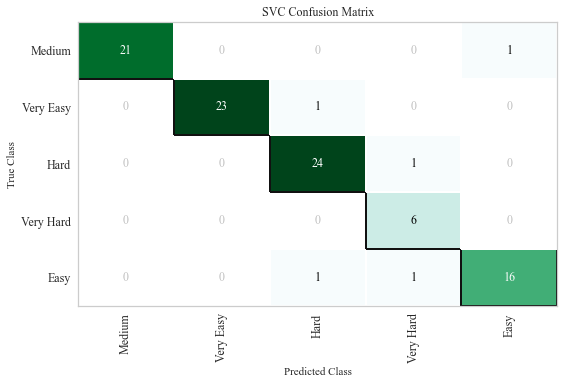

In [17]:
from yellowbrick.classifier import ConfusionMatrix
classes=['Medium','Very Easy','Hard','Very Hard','Easy']
confusion_matrix = ConfusionMatrix(SVM, classes=classes, cmap='BuGn')
confusion_matrix.fit(X_train, y_train)
confusion_matrix.score(X_test, y_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figures\\混淆矩阵热力图.pdf')

<AxesSubplot:title={'center':'SVC Classification Report'}>

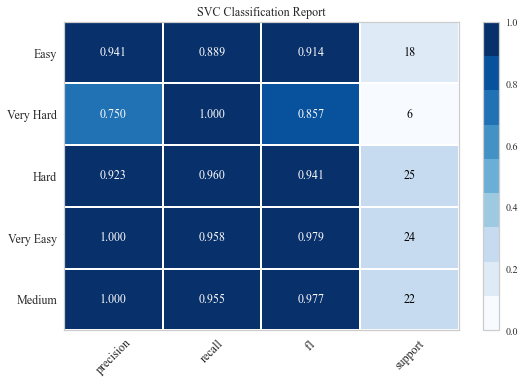

In [18]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(SVM, classes=classes, support=True, cmap='Blues')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figures\\分类报告.pdf')

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

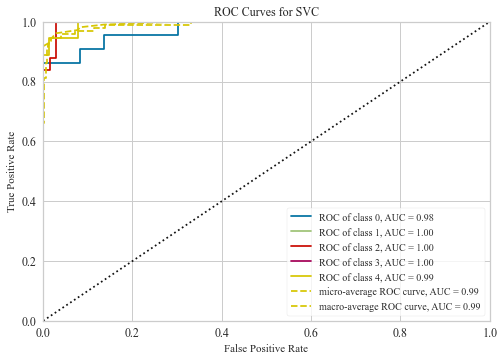

In [19]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(SVM)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figures\\ROCAUC曲线.pdf')

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

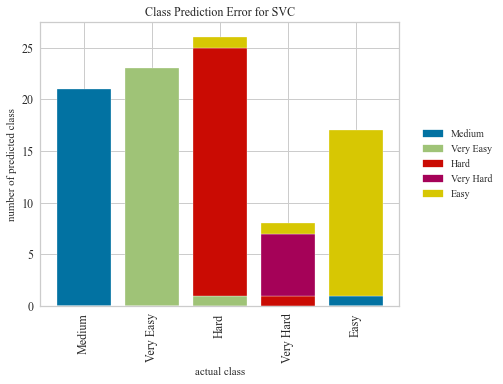

In [20]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(SVM, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figures\\分类预测结果.pdf')